# Part II: Network analysis

In this section we are going to anlyse three networks, specifically:
##### Bipartite Customers-Products network 
Nodes: each node corresponds to a product or a customer. Product nodes have the properties: category and title.
Edges: each edge connects a customer to a product if the customers has reviewed that product. The weight is equal to the rate. Edges have the verified property. 
##### Customers network
Nodes: each node corresponds to a customer. 
Edges: each edge connects two customer if they have bought at least one common product. The weight is equal to the number of common product divided by the rates difference.
##### Products network
Nodes: each node corresponds to a product. Nodes have the properties: category and title. 
Edges: each edge connect to product which have at least one customer in common who has review both. The weight is equal to number of different common customers.

## Preliminaries 

#### Importing libraries
In the code below we import all the libraries needed to execute the notebook.

In [1]:
import re
from os import listdir
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import matplotlib.pylab as plt
from matplotlib import rcParams

### Loading files to create network aftewards
In the code below we define the path which has to be used to load pickle files needed for the network analysis. 

In [2]:
PATH_DATA = "../../Files/"
df_no_text = pd.read_pickle("%sAmazonDataProjectNoText.pkl" % PATH_DATA)

In [3]:
with open('%scustomersDict.pickle' %PATH_DATA, 'rb') as handleC:
    customersDict = pickle.load(handleC)

In [4]:
with open('%sproductsDict.pickle' %PATH_DATA, 'rb') as handleP:
    productsDict = pickle.load(handleP)

## Customers-Products network 

### Network creation
- Loading reviews file
- Customers-Products bipartite network creation
- Writing pickle file to store the Customers-Products network

In [9]:
gCP = nx.Graph()

In [10]:
for index, row in df_no_text.iterrows():
    gCP.add_node(row.customer_id, isCust = True)
    gCP.add_node(row.product_id, isCust = False, title = row.product_title, cat = row.product_category)
    gCP.add_edge(row.customer_id, row.product_id, weight = row.star_rating, verify = row.verified_purchase, date = row.review_date, id_rew = index)

In [ ]:
nx.write_gpickle(gCP, "%srawNetwork.gpickle" %PATH_DATA)

Loading the network from pickle file

In [5]:
gCP = nx.read_gpickle("%srawNetwork.gpickle" %PATH_DATA)

### First Customers-Products analysis 

#### Basic stats
- Nodes number
- Edges number
- Degree distribution

First of all, look at the network dimension.

In [6]:
print("The number of nodes is: %d" %(len(gCP.nodes())))
print("The number of edges is: %d" %(len(gCP.edges())))

The number of nodes is: 994498
The number of edges is: 1704565


Now look at the degree distribution.

Max degree = 7723
Min degree = 1


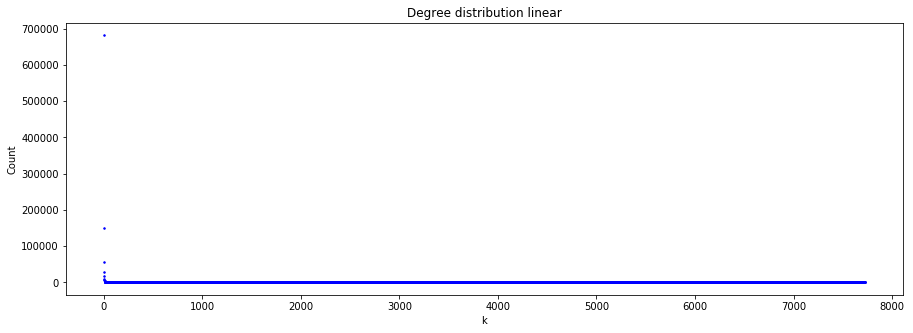

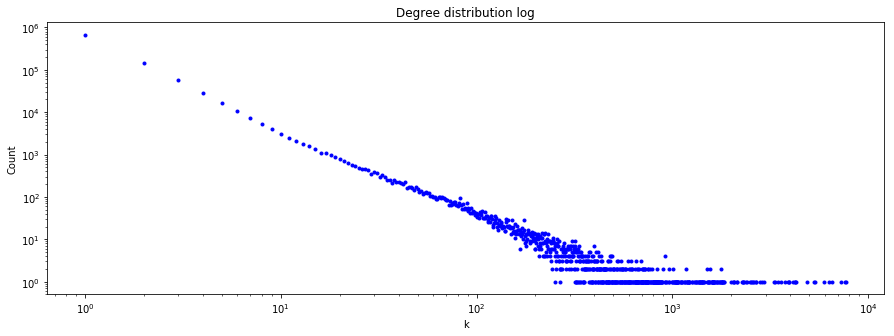

In [14]:
# Degree distribution with plot
degrees = list()
for i in gCP:
    degrees.append(gCP.degree(i))
print("Max degree = " + str(max(degrees)))
print("Min degree = " + str(min(degrees)))

v, b = np.histogram(degrees, max(degrees))
v = np.append(v, 0)
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Degree distribution linear')
plt.xlabel('k')
plt.ylabel('Count')
plt.plot(b, v, 'b.', markersize = 3)
plt.show()
plt.title('Degree distribution log')
plt.xlabel('k')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.plot(b, v, 'bo', markersize = 3)
plt.show()

#### Friendship paradox
Since from the degree distribution it seems to be free scale network, it is interesting to see if it respects the firenship paradox. 

In [17]:
# Friendship paradox
isTrue = 0
for node in gCP.nodes():
    if nx.average_neighbor_degree(gCP, nodes = [node])[node] > gCP.degree(node):
        isTrue += 1

In [22]:
print("The friendship paradox was true for %d times out of %d, which corresponds to the %.2f per cent." %(isTrue, len(gCP.nodes()), float(100 * isTrue / len(gCP.nodes()))))

The friendship paradox was true for 953233 times out of 994498, which corresponds to the 95.00 per cent.


Writing about friendship paradox......

#### Analyse only one category
Since the network is huge we will create the subgraph associated to the biggest category.

In [24]:
# find the top XX categories, build the related network and plot it.
df_no_text.groupby("product_category").size().sort_values(ascending = False)[:10]

product_category
Video DVD                 463178
Music                     329854
Digital_Ebook_Purchase    289111
Books                     257793
Mobile_Apps               218031
Digital_Video_Download     31420
Digital_Music_Purchase     29263
Toys                       24493
PC                         16258
Camera                      6427
dtype: int64

The category with more reviews is Video DVD which has 463178 reviews. Therefore, now we build the subgraph based on this category.

In [38]:
#Create the subgraph composed by the category with more reviews.
gCPTop = nx.Graph()
count = 1
for re in df_no_text[df_no_text.product_category == "Video DVD"].index:
    if count % 10000 == 0:
        print("%d/463178" %(count))
    count += 1
    gCPTop.add_node(df_no_text.loc[re].product_id, isCust = False)
    gCPTop.add_node(df_no_text.loc[re].customer_id, isCust = True)
    gCPTop.add_edge(df_no_text.loc[re].product_id, df_no_text.loc[re].customer_id)

10000/463178
20000/463178
30000/463178
40000/463178
50000/463178
60000/463178
70000/463178
80000/463178
90000/463178
100000/463178
110000/463178
120000/463178
130000/463178
140000/463178
150000/463178
160000/463178
170000/463178
180000/463178
190000/463178
200000/463178
210000/463178
220000/463178
230000/463178
240000/463178
250000/463178
260000/463178
270000/463178
280000/463178
290000/463178
300000/463178
310000/463178
320000/463178
330000/463178
340000/463178
350000/463178
360000/463178
370000/463178
380000/463178
390000/463178
400000/463178
410000/463178
420000/463178
430000/463178
440000/463178
450000/463178
460000/463178


In [39]:
nx.write_gpickle(gCPTop, "%stopCategoryNetwork.gpickle" %PATH_DATA)

In [40]:
print("The number of nodes is: %d" %(len(gCPTop.nodes())))
print("The number of edges is: %d" %(len(gCPTop.edges())))

The number of nodes is: 264632
The number of edges is: 462866


There are less edges than reviews because some customers has reviewed the same product more times. 

#### Degree distribution
Look if the degree distribution reflects the previous one.

Max degree = 3783
Min degree = 1


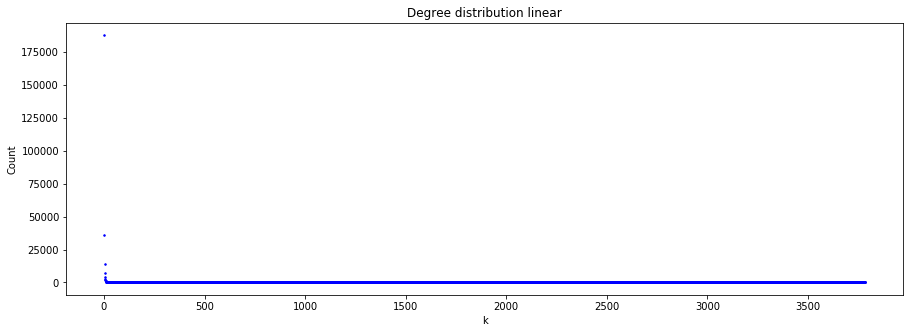

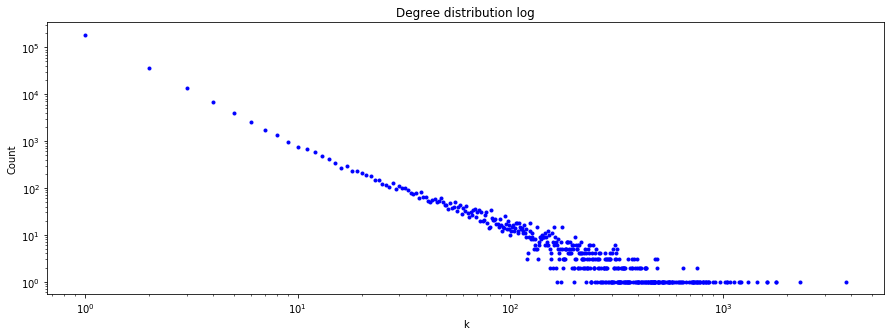

In [49]:
# Degree distribution with plot
degreesTop = list()
for i in gCPTop:
    degreesTop.append(gCPTop.degree(i))
print("Max degree = " + str(max(degreesTop)))
print("Min degree = " + str(min(degreesTop)))

v, b = np.histogram(degreesTop, max(degreesTop))
v = np.append(v, 0)
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Degree distribution linear')
plt.xlabel('k')
plt.ylabel('Count')
plt.plot(b, v, 'b.', markersize = 3)
plt.show()
plt.title('Degree distribution log')
plt.xlabel('k')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.plot(b, v, 'bo', markersize = 3)
plt.show()

Yes it reflects, therefore look again at firendship paradox.

In [51]:
# Friendship paradox
isTrue = 0
for node in gCPTop.nodes():
    if nx.average_neighbor_degree(gCPTop, nodes = [node])[node] > gCPTop.degree(node):
        isTrue += 1

In [52]:
print("The friendship paradox was true for %d times out of %d, which corresponds to the %.2f per cent." %(isTrue, len(gCPTop.nodes()), float(100 * isTrue / len(gCPTop.nodes()))))

The friendship paradox was true for 255480 times out of 264632, which corresponds to the 96.00 per cent.


### Conclusion
Conclsion concerning the Customers-Products network.

## Projections
Now we will study the products and customer networks which are the projections of the bipartite one.

## Customers network 
Since the network is huge, it requires too much time to compute the whole Customers network. Consequently, we have decided to create the network of the middle-5 products, this means that we have not considered 10 products which have a medium number of reviews. 
### Network creation
- Network computation
- Writing pickle file to store the network

First of all, look the top-sale products.

In [53]:
print(len(productsDict.items()))
count = 1
df_no_text.groupby("product_id").size().sort_values(ascending = False)

58618


product_id
B00FAPF5U0    7723
B008D30K7E    7638
B007ZXK08C    7273
B00E8KLWB4    6589
B00NOPQU2K    6307
B00QW8TYWO    5992
B007Z8ZKS2    5356
B00DJFIMW6    5311
B007L3BMGA    4863
B00YN6XHMU    4306
B00992CF6W    4263
B00I8Q77Y0    4260
B00DUGCLY4    4127
0099579936    3967
B0065GC0BA    3927
B00AREIAI8    3920
B00FZLFQ0I    3783
B00BQ4NLC8    3579
B00IG2DOKM    3468
B002RI9UBS    3353
B0078XHAB4    3298
B00D3NSDVO    2942
B0094BB4TW    2862
B004TSXUWY    2800
B0031R5K72    2681
B0090KZDSK    2678
B007TK77QE    2628
B006TF6WAM    2579
B00IK1J9QM    2570
B00D1VKZ3M    2523
              ... 
B001IB03IE       1
B001IBCRYW       1
B001IBG2OI       1
B001IBQ536       1
B001ICFE1E       1
B001I7BHNI       1
B001I5NTVS       1
B001I5KRZ4       1
B001I1RZBM       1
B001HXVJ8Q       1
B001HY5MYW       1
B001HY7C6S       1
B001HY8SPW       1
B001HYC9PM       1
B001HZK8FY       1
B001HZRL5E       1
B001I0N9U4       1
B001I10ABO       1
B001I2NEHA       1
B001I5CCUC       1
B001I3OY4G       1
B

In [65]:
gC = nx.Graph()

In [66]:
count = 1
for pr in df_no_text.groupby("product_id").size().sort_values(ascending = False).keys()[25:30]:
    print("%d/10" %(count))
    count += 1
    if len(productsDict[pr]) == 1:
        gC.add_node(productsDict[pr][0][0])
    else:
        for i, (custIdI, revIdI) in enumerate(productsDict[pr][:-1]):
            for custIdJ, revIdJ in productsDict[pr][i+1:]:
                try:
                    gC[custIdI][custIdJ]["weight"] += 1.0 / (1 + abs(df_no_text.loc[revIdI].star_rating.item() - df_no_text.loc[revIdJ].star_rating.item()))
                except KeyError as e:
                    gC.add_edge(custIdI, custIdJ, weight = 1.0 / (1 + abs(df_no_text.loc[revIdI].star_rating.item() - df_no_text.loc[revIdJ].star_rating.item())))

1/10
2/10


KeyboardInterrupt: 

Started at 17:30

In [ ]:
nx.write_gpickle(gCP, "%scustomersNetwork.gpickle" %PATH_DATA)

In [40]:
print(gC.nodes())

(2, 'due')


In [ ]:
# find the top XX products, build the related network and plot it.
df_no_text.groupby("product_id").size().sort_values(ascending = False)[:10]

#Create the subgraph composed by the top 10 products.
gCPTop = nx.Graph()
for pr in df_no_text.groupby("product_id").size().sort_values(ascending = False)[:1].keys():
    gCPTop.add_node(pr, isCust = False)
    for e in gCP.edges(pr):
        gCPTop.add_node(e[1], isCust = True)
        gCPTop.add_edge(e[1], pr)
print(len(gCPTop.nodes()), len(gCPTop.edges()))

## Products network 

### Network creation
- Network computation
- Writing pickle file to store the network

In [67]:
gP = nx.Graph()

In [12]:
count = 1
for cu, pr in customersDict.items():
    if count % 10000 == 0:
        print("%d/935880" %(count))
    count += 1
    if len(pr) == 1:
        gP.add_node(pr[0][0])
    else:
        for i, (prodIdI, revIdI) in enumerate(pr[:-1]):
            for prodIdJ, revIdJ in pr[i+1:]:
                try:
                    gP[prodIdI][prodIdJ]["weight"] += 1
                except KeyError as e:
                    gP.add_node(prodIdI, title = df_no_text.loc[revIdI].product_title, cat = df_no_text.loc[revIdI].product_category)
                    gP.add_node(prodIdJ, title = df_no_text.loc[revIdJ].product_title, cat = df_no_text.loc[revIdJ].product_category)
                    gP.add_edge(prodIdI, prodIdJ, weight = 1)

10000/935880
20000/935880
30000/935880
40000/935880
50000/935880
60000/935880
70000/935880
80000/935880
90000/935880
100000/935880
110000/935880
120000/935880
130000/935880
140000/935880
150000/935880
160000/935880
170000/935880
180000/935880
190000/935880
200000/935880
210000/935880
220000/935880
230000/935880
240000/935880
250000/935880
260000/935880
270000/935880
280000/935880
290000/935880
300000/935880
310000/935880
320000/935880
330000/935880
340000/935880
350000/935880
360000/935880
370000/935880
380000/935880
390000/935880
400000/935880
410000/935880
420000/935880
430000/935880
440000/935880
450000/935880
460000/935880
470000/935880
480000/935880
490000/935880
500000/935880
510000/935880
520000/935880
530000/935880
540000/935880
550000/935880
560000/935880
570000/935880
580000/935880
590000/935880
600000/935880
610000/935880
620000/935880
630000/935880
640000/935880
650000/935880
660000/935880
670000/935880
680000/935880
690000/935880
700000/935880
710000/935880
720000/935880
7

In [13]:
nx.write_gpickle(gP, "%sproductsNetwork.gpickle" %PATH_DATA)

In [68]:
gP = nx.read_gpickle("%sproductsNetwork.gpickle" %PATH_DATA)

In [69]:
print("The number of nodes is %d" %len(gP.nodes()))
print("The number of edges is %d" %len(gP.edges()))

The number of nodes is 58618
The number of edges is 5705313


#### Degree distribution 
Look at the degree distribution

Max degree = 5882
Min degree = 0


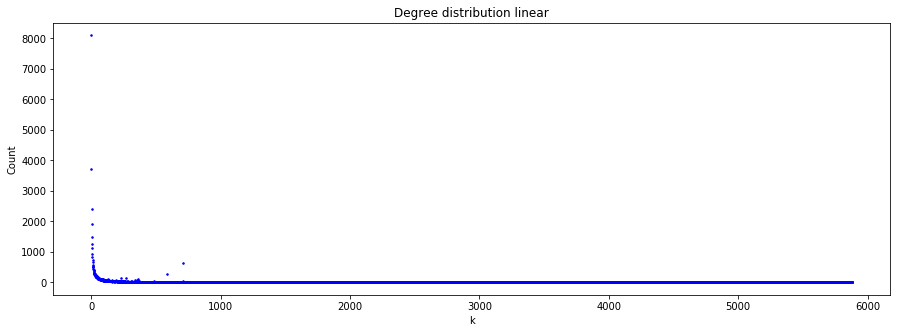

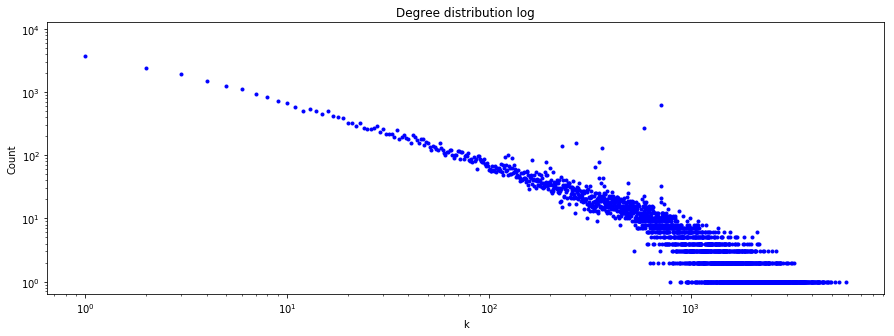

In [71]:
# Degree distribution with plot
degrees = list()
for i in gP:
    degrees.append(gP.degree(i))
print("Max degree = " + str(max(degrees)))
print("Min degree = " + str(min(degrees)))

v, b = np.histogram(degrees, max(degrees))
v = np.append(v, 0)
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Degree distribution linear')
plt.xlabel('k')
plt.ylabel('Count')
plt.plot(b, v, 'b.', markersize = 3)
plt.show()
plt.title('Degree distribution log')
plt.xlabel('k')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.plot(b, v, 'bo', markersize = 3)
plt.show()

?? again it seems a power law distribution.

### Category analysis
Now look at the categories searching which is the one with more reviews. 

In [87]:
cat = dict()
for node in gP.nodes():
    try:
        cat[gP.node[node]["cat"]] = cat.get(gP.node[node]["cat"], 0) + gP.degree(node)
    except KeyError as e:
        continue

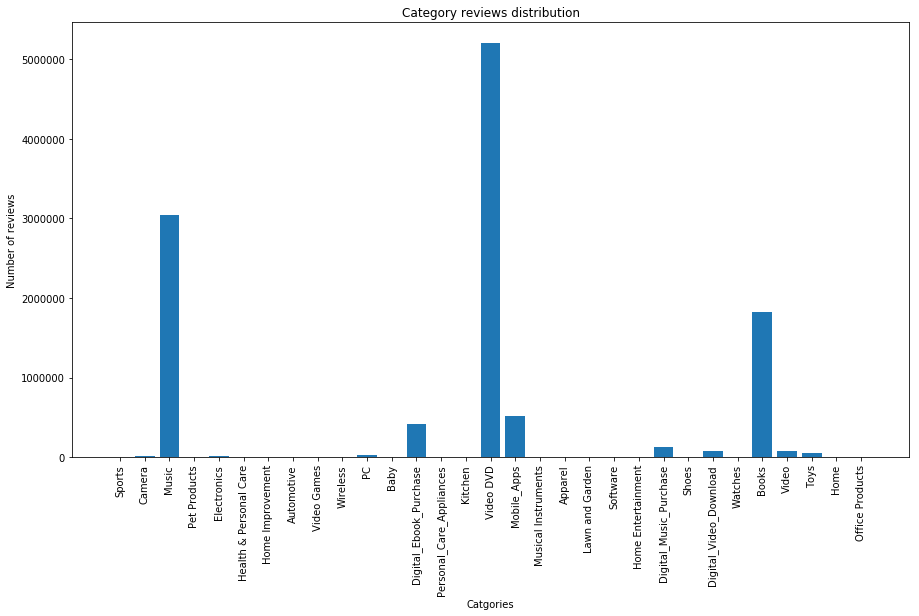

In [98]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.bar(cat.keys(), cat.values())
plt.xticks(cat.keys(), cat.keys(), rotation = 'vertical')
plt.title('Category reviews distribution')
plt.xlabel('Catgories')
plt.ylabel('Number of reviews')
plt.show()

As can be seen in the plot above, many cateogries have few reviews compared with the bigger ones. Therefore, now we plot again by keeping only the important ones.

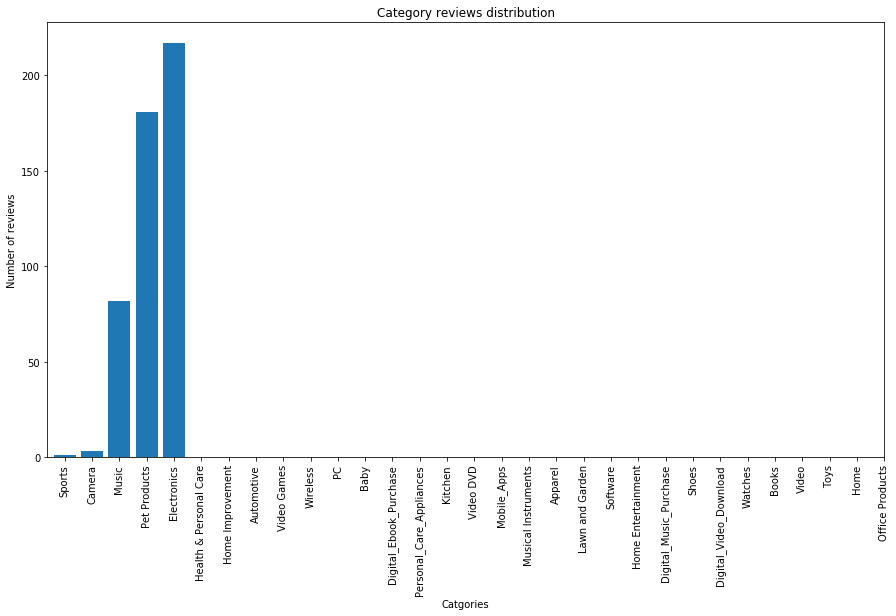

In [101]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.bar(cat.keys()[:5], sorted(cat.values())[:5])
plt.xticks(cat.keys(), cat.keys(), rotation = 'vertical')
plt.title('Category reviews distribution')
plt.xlabel('Catgories')
plt.ylabel('Number of reviews')
plt.show()

In [ ]:
print("The number of nodes is: %d" %(len(gCP.nodes())))
print("The number of edges is: %d" %(len(gCP.edges())))

# Average shortest path lenght
nx.average_shortest_path_length(gCP)

# Average clustering coefficient
nx.average

# Degree distribution with plot
degrees = list()
for i in gCP:
    degrees.append(gCP.degree(i))
print("Max degree = " + str(max(degrees)))
print("Min degree = " + str(min(degrees)))

v, b = np.histogram(degrees, max(degrees))
v = np.append(v, 0)
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Degree distribution linear')
plt.xlabel('k')
plt.ylabel('Count')
plt.plot(b, v, 'b.')
plt.show()
plt.title('Degree distribution log')
plt.xlabel('k')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.plot(b, v, 'bo')
plt.show()

# Average degree connectivity
nx.average_degree_connectivity(gCP)

# Assorativity
nx.degree_assortativity_coefficient(gCP)

# Friendship paradox
isTrue = 0
for i in range(1000):
    node = np.random.choice(nx.nodes(gCP))
    if nx.average_neighbor_degree(gCP, nodes=[node])[node] > gCP.degree(node):
        isTrue += 1
print("The friendship paradox was true for " + str(isTrue) + " times out of 1000")

# Betweenness, eigenvector outgoing strenght
bc = nx.betweenness_centrality(gCP)
ec = nx.eigenvector_centrality(g)
for n in gCP:
    os[gCP.node[n]["Party"]].append(sum(gCP[e[0]][e[1]]["weight"] for e in gCP.edges(n)))
    
# Community and modularity
com = community.best_partition(gCP)
print("The modularity with python Louvain-algorithm implementation is %f" %(community.modularity(com, gCP)))

# Confusion matrix
D = [[0 for _ in range(max(com.values()) + 1)] for _ in range(2)]
for n in g:
    if g.node[n]["Party"] == "Democratic":
        D[0][com[n]] += 1
    else:
        D[1][com[n]] += 1
HIGHLIGHT = True #change this parameter (in False) if you want to highlight the more populated community (more then 10 members)
font = {'size'   : 9}
plt.rc('font', **font)
matrix = np.matrix(D)
plt.matshow(matrix, cmap = plt.cm.Blues)
for i in xrange(max(com.values()) + 1):
    if HIGHLIGHT or (matrix[0, i] + matrix[1, i]) > 10:
        for j in xrange(2):
            c = matrix[j, i]
            plt.text(i, j, str(c), va = 'center', ha = 'center')
plt.title('Confusion matrix', fontsize = 12)
plt.show()